In [5]:
import pandas as pd 
df=pd.read_csv('january_comments.csv')

df.head()

,Unnamed: 0,Unnamed: 0.1,created_utc,author,subreddit,body,score,permalink,date,sentiment_polarity,sentiment_subjectivity,sentiment,preview,month
0,0,0,1577841828,Jouhou,China,"Honestly, the the Chinese climate and the high...",1.0,/r/China/comments/ehx3sw/an_unidentified_type_...,2020-01-01,0.139493,0.478382,positive,"Honestly, the the Chinese climate and the high...",1.0
1,1,1,1577851876,ImpracticalCats,VetTech,"This is interesting, I googled to try to figur...",1.0,/r/VetTech/comments/ei57ml/hello_anybody_here_...,2020-01-01,0.056818,0.586364,positive,"This is interesting, I googled to try to figur...",1.0
2,2,0,1577949412,MyrkyCat,Seattle,That symptom is not pathognomonic for RSV by a...,1.0,/r/Seattle/comments/ehnilr/what_the_heck_kind_...,2020-01-02,-0.017500,0.532500,negative,That symptom is not pathognomonic for RSV by a...,1.0
3,3,0,1577992294,murky_comparison,puppy101,"Immunity, even if the dog has experienced a na...",8.0,/r/puppy101/comments/ej2i1i/how_do_you_feel_ab...,2020-01-02,0.227778,0.370833,positive,"Immunity, even if the dog has experienced a na...",1.0
4,4,0,1578021955,foreignfishes,CatAdvice,If the two kittens lived together in the shelt...,1.0,/r/CatAdvice/comments/eivcf5/should_i_introduc...,2020-01-03,0.073125,0.589375,positive,If the two kittens lived together in the shelt...,1.0


In [11]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
import matplotlib.pyplot as plt

In [13]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words=re.sub("[!@#$+%*:()']", ' ', text)
  
  words = re.sub(r'[^\w\s]', '', text).split()

  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

words = basic_clean(''.join(str(df['body'].tolist())))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
words[:20]

['honestly',
 'chinese',
 'climate',
 'high',
 'density',
 'people',
 'high',
 'density',
 'farm',
 'animal',
 'make',
 'petri',
 'dish',
 'nnthe',
 'big',
 'gap',
 'preventing',
 'nasty',
 'new',
 'illness']

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]


lowercase....

In [16]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]


(virus, corona, virus)                                                       259
(corona, virus, corona)                                                      242
(monitored, constructive, feedback)                                          217
(pm, comment, monitored)                                                     217
(best, tldr, could)                                                          217
(feedbackhttpnpredditcommessagecomposeto23autotldr, pm, comment)             217
(tldrs, far, feedbackhttpnpredditcommessagecomposeto23autotldr)              217
(constructive, feedback, welcome)                                            217
(far, feedbackhttpnpredditcommessagecomposeto23autotldr, pm)                 217
(tldr, could, make)                                                          217
(faqhttpnpredditcomrautotldrcomments31b9fmfaq_autotldr_bot, version, 202)    217
(comment, monitored, constructive)                                           217
(feedback, welcome, top)    

useless.....

SyntaxError: ignored

In [20]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

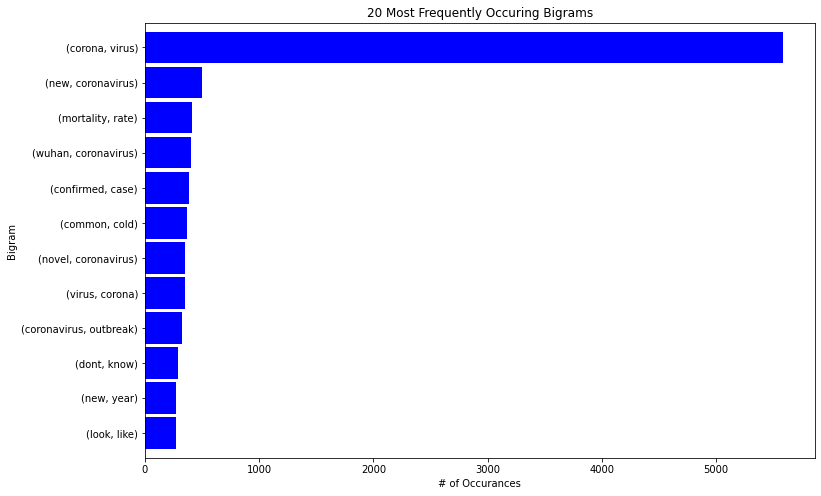

In [21]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [22]:
data = pd.read_csv('./text_emotion.csv')

# Let's drop unnecessary columns from our dataset
data = data.drop('tweet_id', axis=1)
data = data.drop('author', axis=1)
data.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [23]:
data['sentiment'].unique()


array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [25]:
data = data.drop(data[data.sentiment == 'boredom'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'neutral'].index)

In [26]:

data['sentiment'].replace(to_replace='hate', value='anger', inplace=True)
# Let's replace 'worry' for 'fear'
data['sentiment'].replace(to_replace='worry', value='fear', inplace=True)
# Let's see how many tweets we have for each sentiment
data.groupby('sentiment')['sentiment'].count().sort_values(ascending=False)

sentiment
fear         8459
happiness    5209
sadness      5165
anger        1433
Name: sentiment, dtype: int64

In [27]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
import random

def get_synonyms(word):
    """
    Get synonyms of a word
    """
    synonyms = set()
    
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)
def synonym_replacement(words, n):
    
    words = words.split()
    
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break
        return sentence

# Random Insertion

def random_insertion(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        add_word(new_words)
        
    sentence = ' '.join(new_words)
    return sentence

def add_word(new_words):
    
    synonyms = []
    counter = 0
    
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
        
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
#Making all letters lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing Punctuation, Symbols
data['content'] = data['content'].str.replace('[^\w\s]',' ')

#Removing urls, links
data['content'] = data['content'].str.replace('(www|http)\S+', ' ')

#Removing Stop Words using NLTK
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))



In [29]:
nltk.download('wordnet')
p = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Lemmatisation
from textblob import Word
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Correcting Letter Repetitions
import re

def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Code to find the top 1000 rarest words appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-1000:]

# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
print(freq)
print(data['content'])


['newtoid', 'apparantly', 'karramandi', 'ba115', 'prank', '671zy', 'kiis', 'fuming', 'zydrate', 'nta', 'sly', 'shootout', 'lautner', 'sara_luna', 'melrose', 'ekalavyab', '4wjjs', 'batman_sounds', 'rachelxvacancy', 'carparks', '67fs9', 'glorianatheband', 'markmayhew', 'dictum', 'wooww', 'shannongrissom', 'lobbying', 'willow', 'phuture', '5joo9', 'enable', 'gailporter', 'tearr', 'kristenmchugh22', 'astor', 'myfriends', 'worthing', 'nonfunctionalproductive', 'millys', 'trusty', 'granddad', 'aiyaiyah', 'tapping', 'sufka', 'ethan2rock', 'tweets', 'moives', 'alto', 'c_j_stuart', 'russellmoyer', 'becabear', 'oohnoo', 'winebratsf', 'hearn', 'weary', 'profiled', 'nikkibenz', 'antennaswrvu', 'blacksocialite', 'ihuntmidgets', 'heels', 'bethanynyc', 'modcloth', 'jairodriguez', 'ref', 'ciroc', 'sso', 'thedeadknight', 'uninvited', 'emz2009', 'omgoodness', 'jobe', 'gheekchik', '4jazs', 'vennsoh', 'goonight', '98', 'tenticketthrill', 'backlog', 'toolkit', 'dealer', '1mgoldstars', 'swears', 'windycityp

In [ ]:
from keras.utils import to_categorical 
form keras.preprocessing.s